In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca data dari file CSV
data = pd.read_excel('/content/drive/MyDrive/SIDANG SKRIPSI/DATA/DataHasilNormalisasi.xlsx')
data

,Usia Saat Ukur,Berat,Tinggi,JK_L,JK_P,Diagnosa
0,0.6,0.532751,0.694444,1,0,0
1,0.8,0.572052,0.777778,1,0,0
2,0.4,0.436681,0.527778,1,0,1
3,0.0,0.056769,0.069444,1,0,0
4,0.8,0.620087,0.805556,1,0,0
...,...,...,...,...,...,...
2093,0.2,0.323144,0.388889,1,0,0
2094,0.4,0.414847,0.486111,0,1,0
2095,0.2,0.301310,0.388889,0,1,0
2096,0.8,0.537118,0.777778,1,0,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
# Menghitung jumlah orang dalam setiap kelas
jumlah_stunting = (data['Diagnosa'] == 1).sum()
jumlah_tidakstunting= (data['Diagnosa'] == 0).sum()

# Menampilkan hasil
print(f"Jumlah Stunting 1: {jumlah_stunting}")
print(f"Jumlah Tidak Stunting 0: {jumlah_tidakstunting}")

Jumlah Stunting 1: 303
Jumlah Tidak Stunting 0: 1795


In [6]:
data

,Usia Saat Ukur,Berat,Tinggi,JK_L,JK_P,Diagnosa
0,0.6,0.532751,0.694444,1,0,0
1,0.8,0.572052,0.777778,1,0,0
2,0.4,0.436681,0.527778,1,0,1
3,0.0,0.056769,0.069444,1,0,0
4,0.8,0.620087,0.805556,1,0,0
...,...,...,...,...,...,...
2093,0.2,0.323144,0.388889,1,0,0
2094,0.4,0.414847,0.486111,0,1,0
2095,0.2,0.301310,0.388889,0,1,0
2096,0.8,0.537118,0.777778,1,0,0


In [7]:
# Pisahkan fitur dan target
X = data[['Usia Saat Ukur', 'Berat', 'Tinggi','JK_L','JK_P']]  # Fitur (input)
y = data['Diagnosa']  # Target (output)

In [8]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Kernel Linear Non SMOTE**

In [9]:
# Inisialisasi model SVM
model = SVC(kernel='linear', C=1, decision_function_shape='ovr')

In [10]:
import time
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)

# List untuk menyimpan waktu eksekusi setiap fold
execution_times = []

# Menyimpan nilai akurasi dari setiap lipatan
accuracies = []
start_time = time.time()

# Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
for i, (train_index, test_index) in enumerate(k_fold.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    fold_start_time = time.time()

    # Melatih model
    model.fit(X_train_fold, y_train_fold)

    # Menguji model
    y_pred_fold = model.predict(X_val_fold)

    # Menghitung akurasi di setiap fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    fold_end_time = time.time()

    # Menghitung dan menyimpan waktu eksekusi fold
    fold_execution_time = fold_end_time - fold_start_time
    execution_times.append(fold_execution_time)

    print(f'Accuracy di fold {i+1}: {accuracy_fold * 100:.2f}%')
    print(f'Fold {i+1} execution time: {fold_execution_time:.4f} seconds')

end_time = time.time()

# Menampilkan rata-rata akurasi dari setiap lipatan
print(f'Mean Accuracy of K-Fold Cross Validation: {np.mean(accuracies) * 100:.2f}%')

# Menampilkan waktu total eksekusi K-Fold Cross Validation
print(f'Total Execution Time of K-Fold Cross Validation: {end_time - start_time:.4f} seconds')


Accuracy di fold 1: 84.52%
Fold 1 execution time: 0.0939 seconds
Accuracy di fold 2: 86.31%
Fold 2 execution time: 0.1119 seconds
Accuracy di fold 3: 85.42%
Fold 3 execution time: 0.0925 seconds
Accuracy di fold 4: 82.39%
Fold 4 execution time: 0.0980 seconds
Accuracy di fold 5: 85.67%
Fold 5 execution time: 0.1161 seconds
Mean Accuracy of K-Fold Cross Validation: 84.86%
Total Execution Time of K-Fold Cross Validation: 0.5450 seconds


In [11]:
import time
from sklearn.model_selection import KFold, cross_val_score
import pickle

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)

# List untuk menyimpan waktu eksekusi setiap fold
execution_times = []

# Menyimpan nilai akurasi dari setiap lipatan
accuracies = []
start_time = time.time()

# List untuk menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
models = []

# Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
for i, (train_index, test_index) in enumerate(k_fold.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    fold_start_time = time.time()

    # Melatih model
    model.fit(X_train_fold, y_train_fold)

    # Menyimpan model pada iterasi saat ini
    models.append(model)

    # Menguji model
    y_pred_fold = model.predict(X_val_fold)

    # Menghitung akurasi di setiap fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    fold_end_time = time.time()

    # Menghitung dan menyimpan waktu eksekusi fold
    fold_execution_time = fold_end_time - fold_start_time
    execution_times.append(fold_execution_time)

    print(f'Accuracy di fold {i+1}: {accuracy_fold * 100:.2f}%')
    print(f'Fold {i+1} execution time: {fold_execution_time:.4f} seconds')

end_time = time.time()

# Menampilkan rata-rata akurasi dari setiap lipatan
print(f'Mean Accuracy of K-Fold Cross Validation: {np.mean(accuracies) * 100:.2f}%')

# Menampilkan waktu total eksekusi K-Fold Cross Validation
print(f'Total Execution Time of K-Fold Cross Validation: {end_time - start_time:.4f} seconds')


# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
for i, model in enumerate(models):
    with open(f'model_{i+1}.pkl', 'wb') as f:
        pickle.dump(model, f)


Accuracy di fold 1: 84.52%
Fold 1 execution time: 0.1800 seconds
Accuracy di fold 2: 86.31%
Fold 2 execution time: 0.1236 seconds
Accuracy di fold 3: 85.42%
Fold 3 execution time: 0.0886 seconds
Accuracy di fold 4: 82.39%
Fold 4 execution time: 0.1718 seconds
Accuracy di fold 5: 85.67%
Fold 5 execution time: 0.1975 seconds
Mean Accuracy of K-Fold Cross Validation: 84.86%
Total Execution Time of K-Fold Cross Validation: 0.7987 seconds


In [12]:
import pickle
import pandas as pd

# List untuk menyimpan model yang dimuat
loaded_models = []

# Memuat kembali setiap model
for i in range(1, 6):  # Jumlah model sesuai dengan jumlah lipatan K-Fold
    with open(f'model_{i}.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
        loaded_models.append(loaded_model)

# Menampilkan isi dari setiap model
for i, model in enumerate(loaded_models):
    print(f"Model {i+1}:")
    print(model)
    print("\n")

# Memuat informasi dari model SVC ke dalam DataFrame
model_info = {
    "Support Vectors": [model.support_vectors_ for model in loaded_models],
    "Indices of Support Vectors": [model.support_ for model in loaded_models],
    "Number of Support Vectors for Each Class": [model.n_support_ for model in loaded_models],
    "Intercept": [model.intercept_ for model in loaded_models],
    "Kernel Parameters": [model.get_params() for model in loaded_models]
}

model_df = pd.DataFrame(model_info)

# Menampilkan DataFrame
print(model_df)


Model 1:
SVC(C=1, kernel='linear')


Model 2:
SVC(C=1, kernel='linear')


Model 3:
SVC(C=1, kernel='linear')


Model 4:
SVC(C=1, kernel='linear')


Model 5:
SVC(C=1, kernel='linear')


                                     Support Vectors  \
0  [[0.0, 0.1528384279475983, 0.1666666666666666,...   
1  [[0.0, 0.1528384279475983, 0.1666666666666666,...   
2  [[0.0, 0.1528384279475983, 0.1666666666666666,...   
3  [[0.0, 0.1528384279475983, 0.1666666666666666,...   
4  [[0.0, 0.1528384279475983, 0.1666666666666666,...   

                          Indices of Support Vectors  \
0  [0, 6, 13, 19, 21, 26, 34, 41, 44, 48, 50, 55,...   
1  [0, 6, 13, 19, 21, 26, 34, 41, 44, 48, 50, 55,...   
2  [0, 6, 13, 19, 21, 26, 34, 41, 44, 48, 50, 55,...   
3  [0, 6, 13, 19, 21, 26, 34, 41, 44, 48, 50, 55,...   
4  [0, 6, 13, 19, 21, 26, 34, 41, 44, 48, 50, 55,...   

  Number of Support Vectors for Each Class              Intercept  \
0                               [214, 206]  [-0.9992725369778873]   
1  

In [13]:
# Melatih model pada data latih
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [14]:
# Menguji model pada data uji
y_pred = model.predict(X_test)

In [15]:
# Mengukur akurasi pada data uji
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy Menggunakan data uji: {accuracy * 100:.2f}%')
print(f'Presisi: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')

Accuracy Menggunakan data uji: 88.33%
Presisi: 44.17%
Recall: 50.00%
F1-score: 46.90%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


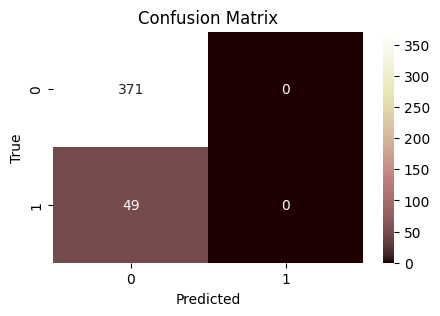

In [16]:
from sklearn.metrics import confusion_matrix
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix dalam bentuk heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report

# Menampilkan precision, recall, dan F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       371
           1       0.00      0.00      0.00        49

    accuracy                           0.88       420
   macro avg       0.44      0.50      0.47       420
weighted avg       0.78      0.88      0.83       420



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Kernel rbf Non SMOTE**

In [18]:
# Inisialisasi model SVM dengan kernel rbf
model_rbf = SVC(kernel='rbf', C=1, decision_function_shape='ovr')


Using RBF Kernel with gamma=0.001:
CV Scores: [0.87797619 0.88095238 0.86607143 0.8358209  0.84477612]
Mean CV Score: 86.11%
Accuracy using test data: 83.33%
Precision: 41.67%
Recall: 50.00%
F1-score: 45.45%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


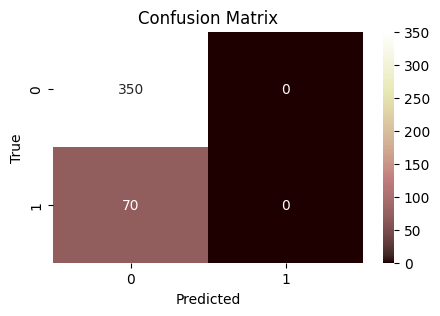

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       350
           1       0.00      0.00      0.00        70

    accuracy                           0.83       420
   macro avg       0.42      0.50      0.45       420
weighted avg       0.69      0.83      0.76       420

Total Execution Time using RBF Kernel with gamma=0.001: 2.0539 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Using RBF Kernel with gamma=0.01:
CV Scores: [0.87797619 0.88095238 0.86607143 0.8358209  0.84477612]
Mean CV Score: 86.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy using test data: 83.33%
Precision: 41.67%
Recall: 50.00%
F1-score: 45.45%


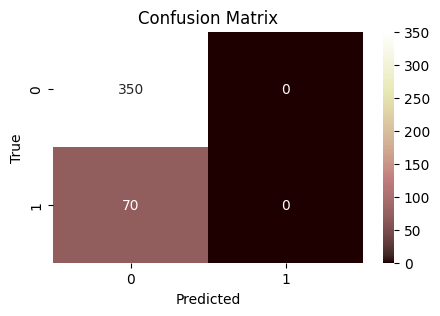

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       350
           1       0.00      0.00      0.00        70

    accuracy                           0.83       420
   macro avg       0.42      0.50      0.45       420
weighted avg       0.69      0.83      0.76       420

Total Execution Time using RBF Kernel with gamma=0.01: 1.9017 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Using RBF Kernel with gamma=0.1:
CV Scores: [0.87797619 0.88095238 0.86607143 0.8358209  0.84477612]
Mean CV Score: 86.11%
Accuracy using test data: 83.33%
Precision: 41.67%
Recall: 50.00%
F1-score: 45.45%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


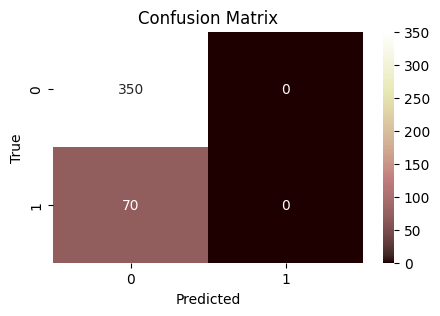

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       350
           1       0.00      0.00      0.00        70

    accuracy                           0.83       420
   macro avg       0.42      0.50      0.45       420
weighted avg       0.69      0.83      0.76       420

Total Execution Time using RBF Kernel with gamma=0.1: 1.6890 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Nilai-nilai gamma yang akan diuji
gamma_values = [0.001, 0.01, 0.1]

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

for gamma in gamma_values:
    print(f"\nUsing RBF Kernel with gamma={gamma}:")
    model_rbf = SVC(kernel='rbf', C=1, gamma=gamma, decision_function_shape='ovr')
    start_time_rbf = time.time()
    cv_scores_rbf = kfold_cross_validation(model_rbf, X_train, y_train, k_fold)
    train_and_evaluate_model(model_rbf, X_train, X_test, y_train, y_test)
    end_time_rbf = time.time()
    print(f'Total Execution Time using RBF Kernel with gamma={gamma}: {end_time_rbf - start_time_rbf:.4f} seconds')

    # Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
    models_rbf = []
    for train_index, test_index in k_fold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model_rbf.fit(X_train_fold, y_train_fold)
        models_rbf.append(model_rbf)

    def save_models(models, gamma):
        for i, model in enumerate(models):
            with open(f'model_rbf_gamma_{gamma}_{i+1}.pkl', 'wb') as f:
                pickle.dump(model, f)

    save_models(models_rbf, gamma)


##  **Kernel Sigmoid Non SMOTE**

Using Sigmoid Kernel:
CV Scores: [0.76488095 0.79464286 0.75892857 0.75223881 0.73134328]
Mean CV Score: 76.04%
Accuracy using test data: 74.05%
Precision: 44.40%
Recall: 46.14%
F1-score: 45.09%


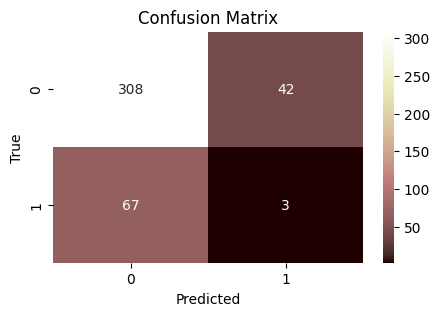

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       350
           1       0.07      0.04      0.05        70

    accuracy                           0.74       420
   macro avg       0.44      0.46      0.45       420
weighted avg       0.70      0.74      0.72       420

Total Execution Time using Sigmoid Kernel: 1.3139 seconds


In [20]:
import time
import pickle
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model SVM dengan kernel sigmoid
model_sigmoid = SVC(kernel='sigmoid', C=1, decision_function_shape='ovr')

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Contoh penggunaan dengan kernel sigmoid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Using Sigmoid Kernel:")
start_time_sigmoid = time.time()
cv_scores_sigmoid = kfold_cross_validation(model_sigmoid, X_train, y_train, k_fold)
train_and_evaluate_model(model_sigmoid, X_train, X_test, y_train, y_test)
end_time_sigmoid = time.time()
print(f'Total Execution Time using Sigmoid Kernel: {end_time_sigmoid - start_time_sigmoid:.4f} seconds')

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models):
    for i, model in enumerate(models):
        with open(f'model_sigmoid_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

models_sigmoid = []
for train_index, test_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model_sigmoid.fit(X_train_fold, y_train_fold)
    models_sigmoid.append(model_sigmoid)

save_models(models_sigmoid)


##  **Kernel Polynomial Non SMOTE**

Using Polynomial Kernel:
CV Scores: [0.93154762 0.94642857 0.92261905 0.88955224 0.92238806]
Mean CV Score: 92.25%
Accuracy using test data: 90.00%
Precision: 89.50%
Recall: 72.29%
F1-score: 77.33%


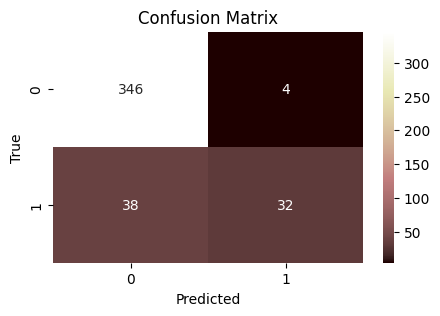

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       350
           1       0.89      0.46      0.60        70

    accuracy                           0.90       420
   macro avg       0.89      0.72      0.77       420
weighted avg       0.90      0.90      0.89       420

Total Execution Time using Polynomial Kernel: 0.8853 seconds


In [21]:
import time
import pickle
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model SVM dengan kernel polynomial
model_poly = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr')

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Contoh penggunaan dengan kernel polynomial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Using Polynomial Kernel:")
start_time_poly = time.time()
cv_scores_poly = kfold_cross_validation(model_poly, X_train, y_train, k_fold)
train_and_evaluate_model(model_poly, X_train, X_test, y_train, y_test)
end_time_poly = time.time()
print(f'Total Execution Time using Polynomial Kernel: {end_time_poly - start_time_poly:.4f} seconds')

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models):
    for i, model in enumerate(models):
        with open(f'model_poly_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

models_poly = []
for train_index, test_index in k_fold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model_poly.fit(X_train_fold, y_train_fold)
    models_poly.append(model_poly)

save_models(models_poly)


## **SMOTE**

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
from collections import Counter

In [24]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tampilkan jumlah data kelas dari data training sebelum SMOTE
label_kelas = np.array(y_train)
print("Jumlah Data Kelas Dari Data Training Pada Data Sebelum SMOTE:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

# Scaling data (jika diperlukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Tampilkan jumlah data kelas dari data training setelah SMOTE
print("\nJumlah Data Kelas Dari Data Training Setelah SMOTE:")
print("Kelas 0:", np.sum(y_train_balanced == 0))
print("Kelas 1:", np.sum(y_train_balanced == 1))

print("\nJumlah Data Dari Data Training Sebelum SMOTE:", len(X_train))
print("Jumlah Data Dari Data Training Setelah SMOTE:", len(X_train_balanced))

Jumlah Data Kelas Dari Data Training Pada Data Sebelum SMOTE:
Kelas 0: 1424
Kelas 1: 254

Jumlah Data Kelas Dari Data Training Setelah SMOTE:
Kelas 0: 1424
Kelas 1: 1424

Jumlah Data Dari Data Training Sebelum SMOTE: 1678
Jumlah Data Dari Data Training Setelah SMOTE: 2848


In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1678, 5)
(1678,)
(420, 5)
(420,)


## **SVM Kenel Linear**

Using Linear Kernel:
CV Scores: [0.83508772 0.83157895 0.82807018 0.84182777 0.82601054]
Mean CV Score: 83.25%
Accuracy using test data: 74.76%
Precision: 65.19%
Recall: 83.94%
F1-score: 65.22%


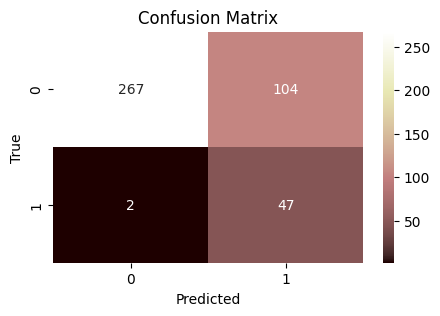

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       371
           1       0.31      0.96      0.47        49

    accuracy                           0.75       420
   macro avg       0.65      0.84      0.65       420
weighted avg       0.91      0.75      0.79       420

Total Execution Time using Linear Kernel: 2.1495 seconds


In [26]:
# Inisialisasi model SVM dengan kernel linear
model_linear = SVC(kernel='linear', C=1, decision_function_shape='ovr')

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Contoh penggunaan dengan kernel linear
print("Using Linear Kernel:")
start_time_linear = time.time()
cv_scores_linear = kfold_cross_validation(model_linear, X_train_balanced, y_train_balanced, k_fold)
train_and_evaluate_model(model_linear, X_train_balanced, X_test_scaled, y_train_balanced, y_test)
end_time_linear = time.time()
print(f'Total Execution Time using Linear Kernel: {end_time_linear - start_time_linear:.4f} seconds')

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models):
    for i, model in enumerate(models):
        with open(f'model_linear_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

models_linear = []
for train_index, test_index in k_fold.split(X_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]
    model_linear.fit(X_train_fold, y_train_fold)
    models_linear.append(model_linear)

save_models(models_linear)


## **SVM Kernel RBF**


Using RBF Kernel with gamma=0.001:
CV Scores: [0.83508772 0.79473684 0.81578947 0.76801406 0.77504394]
Mean CV Score: 79.77%
Accuracy using test data: 69.76%
Precision: 62.93%
Recall: 80.23%
F1-score: 60.78%


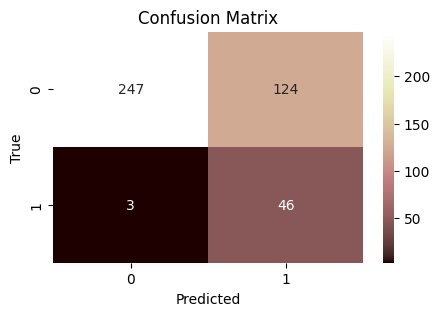

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       371
           1       0.27      0.94      0.42        49

    accuracy                           0.70       420
   macro avg       0.63      0.80      0.61       420
weighted avg       0.90      0.70      0.75       420

Total Execution Time using RBF Kernel with gamma=0.001: 3.9263 seconds

Using RBF Kernel with gamma=0.01:
CV Scores: [0.86140351 0.84035088 0.83333333 0.84710018 0.84182777]
Mean CV Score: 84.48%
Accuracy using test data: 75.71%
Precision: 65.01%
Recall: 82.71%
F1-score: 65.57%


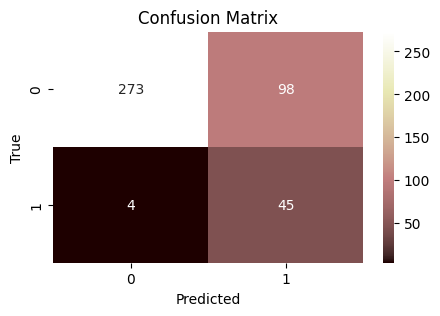

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       371
           1       0.31      0.92      0.47        49

    accuracy                           0.76       420
   macro avg       0.65      0.83      0.66       420
weighted avg       0.91      0.76      0.80       420

Total Execution Time using RBF Kernel with gamma=0.01: 2.6083 seconds

Using RBF Kernel with gamma=0.1:
CV Scores: [0.88421053 0.86315789 0.85263158 0.85940246 0.85764499]
Mean CV Score: 86.34%
Accuracy using test data: 85.95%
Precision: 71.67%
Recall: 87.62%
F1-score: 75.68%


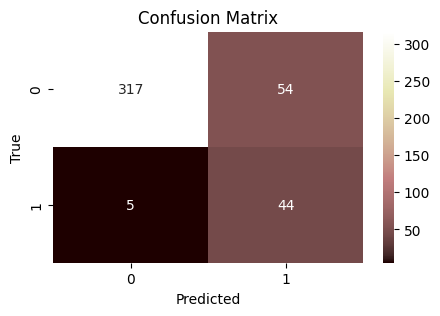

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       371
           1       0.45      0.90      0.60        49

    accuracy                           0.86       420
   macro avg       0.72      0.88      0.76       420
weighted avg       0.92      0.86      0.88       420

Total Execution Time using RBF Kernel with gamma=0.1: 1.2989 seconds


In [27]:

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models, kernel_type, gamma):
    for i, model in enumerate(models):
        with open(f'model_{kernel_type}_gamma_{gamma}_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

# Daftar nilai gamma yang akan diuji
gamma_values = [0.001, 0.01, 0.1]

# Loop untuk setiap nilai gamma
for gamma in gamma_values:
    print(f"\nUsing RBF Kernel with gamma={gamma}:")
    model_rbf = SVC(kernel='rbf', gamma=gamma, C=1, decision_function_shape='ovr')

    start_time_rbf = time.time()
    cv_scores_rbf = kfold_cross_validation(model_rbf, X_train_balanced, y_train_balanced, k_fold)
    train_and_evaluate_model(model_rbf, X_train_balanced, X_test_scaled, y_train_balanced, y_test)
    end_time_rbf = time.time()
    print(f'Total Execution Time using RBF Kernel with gamma={gamma}: {end_time_rbf - start_time_rbf:.4f} seconds')

    models_rbf = []
    for train_index, test_index in k_fold.split(X_train_balanced):
        X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
        y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]
        model_rbf.fit(X_train_fold, y_train_fold)
        models_rbf.append(model_rbf)

    save_models(models_rbf, 'rbf', gamma)


## **SVM Kernel Sigmoid**


Using Sigmoid Kernel:
CV Scores: [0.58947368 0.63684211 0.59298246 0.6115993  0.63620387]
Mean CV Score: 61.34%
Accuracy using test data: 62.14%
Precision: 55.02%
Recall: 61.74%
F1-score: 50.90%


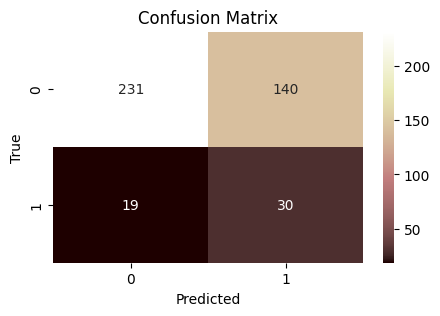

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       371
           1       0.18      0.61      0.27        49

    accuracy                           0.62       420
   macro avg       0.55      0.62      0.51       420
weighted avg       0.84      0.62      0.69       420

Total Execution Time using Sigmoid Kernel: 2.1763 seconds


In [28]:
# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models, kernel_type):
    for i, model in enumerate(models):
        with open(f'model_{kernel_type}_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

print("\nUsing Sigmoid Kernel:")
model_sigmoid = SVC(kernel='sigmoid', C=1, decision_function_shape='ovr')
start_time_sigmoid = time.time()
cv_scores_sigmoid = kfold_cross_validation(model_sigmoid, X_train_balanced, y_train_balanced, k_fold)
train_and_evaluate_model(model_sigmoid, X_train_balanced, X_test_scaled, y_train_balanced, y_test)
end_time_sigmoid = time.time()
print(f'Total Execution Time using Sigmoid Kernel: {end_time_sigmoid - start_time_sigmoid:.4f} seconds')

models_sigmoid = []
for train_index, test_index in k_fold.split(X_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]
    model_sigmoid.fit(X_train_fold, y_train_fold)
    models_sigmoid.append(model_sigmoid)

save_models(models_sigmoid, 'sigmoid')


## **SVM Kernel Polynomial**


Using Polynomial Kernel:
CV Scores: [0.87719298 0.85789474 0.83684211 0.8629174  0.8400703 ]
Mean CV Score: 85.50%
Accuracy using test data: 82.86%
Precision: 69.01%
Recall: 85.87%
F1-score: 72.21%


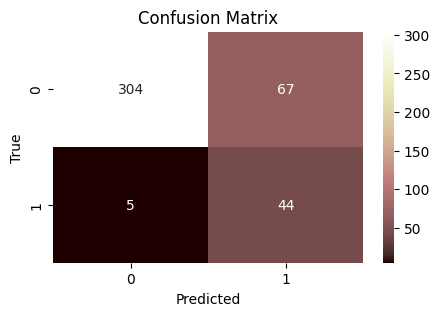

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       371
           1       0.40      0.90      0.55        49

    accuracy                           0.83       420
   macro avg       0.69      0.86      0.72       420
weighted avg       0.92      0.83      0.85       420

Total Execution Time using Polynomial Kernel: 1.5390 seconds


In [29]:
# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models, kernel_type):
    for i, model in enumerate(models):
        with open(f'model_{kernel_type}_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

print("\nUsing Polynomial Kernel:")
model_poly = SVC(kernel='poly', C=1, degree=3, decision_function_shape='ovr')
start_time_poly = time.time()
cv_scores_poly = kfold_cross_validation(model_poly, X_train_balanced, y_train_balanced, k_fold)
train_and_evaluate_model(model_poly, X_train_balanced, X_test_scaled, y_train_balanced, y_test)
end_time_poly = time.time()
print(f'Total Execution Time using Polynomial Kernel: {end_time_poly - start_time_poly:.4f} seconds')

models_poly = []
for train_index, test_index in k_fold.split(X_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]
    model_poly.fit(X_train_fold, y_train_fold)
    models_poly.append(model_poly)

save_models(models_poly, 'poly')

## **Eclidean Distance**

Jumlah data pada set train: 1678
Jumlah data pada set test: 420
Distribusi kelas sebelum SMOTE:
Kelas 0: 1445
Kelas 1: 233

Mean Accuracy of K-Fold Cross Validation with K=5: 78.43%
Accuracy on Test Data: 79.29%
Precision: 70.13%
Recall: 81.86%
F1-score: 72.11%


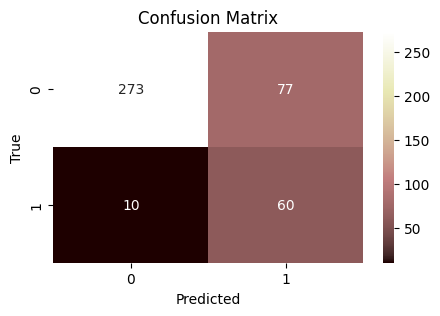

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       350
           1       0.44      0.86      0.58        70

    accuracy                           0.79       420
   macro avg       0.70      0.82      0.72       420
weighted avg       0.88      0.79      0.82       420



In [30]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import pandas as pd
from collections import Counter
import numpy as np

# Memuat data
# Pisahkan fitur dan target
X = data[['Usia Saat Ukur', 'Berat', 'Tinggi', 'JK_L', 'JK_P']]  # Fitur (input)
y = data['Diagnosa']  # Target (output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data
print(f"Jumlah data pada set train: {X_train.shape[0]}")
print(f"Jumlah data pada set test: {X_test.shape[0]}")

# Fungsi untuk mencetak distribusi kelas
def print_class_distribution(y, title):
    counter = Counter(y)
    print(title)
    for cls in sorted(counter.keys()):
        print(f"Kelas {cls}: {counter[cls]}")
    print()

# Mencetak distribusi kelas sebelum SMOTE
print_class_distribution(y_train, "Distribusi kelas sebelum SMOTE:")

# Melakukan K-Fold Cross Validation dengan nilai fold 5
def k_fold_cross_validation(X_train, y_train):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
    accuracies = []
    models = []

    for train_index, val_index in k_fold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Data preprocessing
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train_fold)

        # Model training dengan kernel linear (Manhattan)
        svm_classifier = SVC(kernel='linear', C=2.33, gamma=0.45, probability=True)
        svm_classifier.fit(X_train_res, y_train_res)

        # Model evaluation
        y_pred = svm_classifier.predict(X_val_scaled)
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracies.append(accuracy)

        models.append(svm_classifier)

    mean_accuracy = np.mean(accuracies) * 100
    print(f'Mean Accuracy of K-Fold Cross Validation with K=5: {mean_accuracy:.2f}%')

    return models

# Melakukan validasi silang dan mendapatkan model terbaik
models = k_fold_cross_validation(X_train, y_train)
mean_accuracies = []

for model in models:
    mean_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    mean_accuracies.append(mean_accuracy)

best_model_idx = np.argmax(mean_accuracies)
best_model = models[best_model_idx]
with open('best_model_manhattan.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# Menguji model terbaik pada data uji
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred_test = best_model.predict(X_test_scaled)

# Mengukur dan menampilkan performa pada data uji
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix dalam bentuk heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


## **Manhattan Distance**

Jumlah data pada set train: 1678
Jumlah data pada set test: 420
Distribusi kelas sebelum SMOTE:
Kelas 0: 1445
Kelas 1: 233

Mean Accuracy of K-Fold Cross Validation with K=5: 78.43%
Accuracy on Test Data: 79.29%
Precision: 70.13%
Recall: 81.86%
F1-score: 72.11%


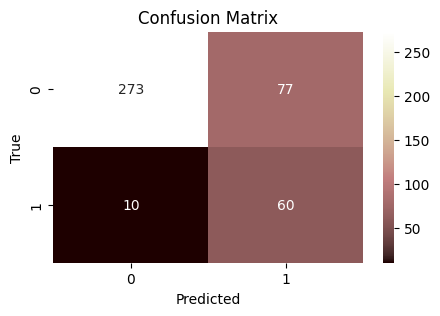

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       350
           1       0.44      0.86      0.58        70

    accuracy                           0.79       420
   macro avg       0.70      0.82      0.72       420
weighted avg       0.88      0.79      0.82       420



In [31]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import pandas as pd
from collections import Counter
import numpy as np

# Memuat data
# Pisahkan fitur dan target
X = data[['Usia Saat Ukur', 'Berat', 'Tinggi', 'JK_L', 'JK_P']]  # Fitur (input)
y = data['Diagnosa']  # Target (output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data
print(f"Jumlah data pada set train: {X_train.shape[0]}")
print(f"Jumlah data pada set test: {X_test.shape[0]}")

# Fungsi untuk mencetak distribusi kelas
def print_class_distribution(y, title):
    counter = Counter(y)
    print(title)
    for cls in sorted(counter.keys()):
        print(f"Kelas {cls}: {counter[cls]}")
    print()

# Mencetak distribusi kelas sebelum SMOTE
print_class_distribution(y_train, "Distribusi kelas sebelum SMOTE:")

# Melakukan K-Fold Cross Validation dengan nilai fold 5
def k_fold_cross_validation(X_train, y_train):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
    accuracies = []
    models = []

    for train_index, val_index in k_fold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Data preprocessing
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train_fold)

        # Model training dengan kernel linear (Manhattan)
        svm_classifier = SVC(kernel='linear', C=2.33, gamma=0.45, probability=True)
        svm_classifier.fit(X_train_res, y_train_res)

        # Model evaluation
        y_pred = svm_classifier.predict(X_val_scaled)
        accuracy = accuracy_score(y_val_fold, y_pred)
        accuracies.append(accuracy)

        models.append(svm_classifier)

    mean_accuracy = np.mean(accuracies) * 100
    print(f'Mean Accuracy of K-Fold Cross Validation with K=5: {mean_accuracy:.2f}%')

    return models

# Melakukan validasi silang dan mendapatkan model terbaik
models = k_fold_cross_validation(X_train, y_train)
mean_accuracies = []

for model in models:
    mean_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    mean_accuracies.append(mean_accuracy)

best_model_idx = np.argmax(mean_accuracies)
best_model = models[best_model_idx]
with open('best_model_manhattan.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# Menguji model terbaik pada data uji
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred_test = best_model.predict(X_test_scaled)

# Mengukur dan menampilkan performa pada data uji
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f'Accuracy on Test Data: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix dalam bentuk heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


## **Undersampling - Data Seimbang**

Jumlah Data Kelas Dari Data Training Pada Data Sebelum Undersampling:
Kelas 0: 1424
Kelas 1: 254

Jumlah Data Kelas Dari Data Training Setelah Undersampling:
Kelas 0: 254
Kelas 1: 254

Jumlah Data Dari Data Training Sebelum Undersampling: 1678
Jumlah Data Dari Data Training Setelah Undersampling: 508
Using Linear Kernel:
CV Scores: [0.78431373 0.83333333 0.82352941 0.87128713 0.88118812]
Mean CV Score: 83.87%
Accuracy using test data: 75.00%
Precision: 64.68%
Recall: 82.31%
F1-score: 64.94%


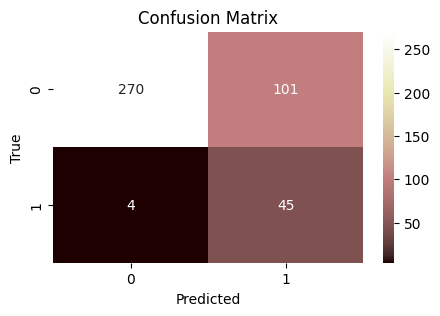

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       371
           1       0.31      0.92      0.46        49

    accuracy                           0.75       420
   macro avg       0.65      0.82      0.65       420
weighted avg       0.91      0.75      0.79       420

Total Execution Time using Linear Kernel: 0.4631 seconds


In [32]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import pickle

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tampilkan jumlah data kelas dari data training sebelum undersampling
label_kelas = np.array(y_train)
print("Jumlah Data Kelas Dari Data Training Pada Data Sebelum Undersampling:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_scaled, y_train)

# Tampilkan jumlah data kelas dari data training setelah undersampling
print("\nJumlah Data Kelas Dari Data Training Setelah Undersampling:")
print("Kelas 0:", np.sum(y_train_balanced == 0))
print("Kelas 1:", np.sum(y_train_balanced == 1))

print("\nJumlah Data Dari Data Training Sebelum Undersampling:", len(X_train))
print("Jumlah Data Dari Data Training Setelah Undersampling:", len(X_train_balanced))

# Inisialisasi model SVM dengan kernel linear
model_linear = SVC(kernel='linear', C=1, decision_function_shape='ovr')

# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Fungsi untuk melakukan K-Fold Cross Validation
def kfold_cross_validation(model, X_train, y_train, k_fold):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores) * 100:.2f}%')
    return cv_scores

# Fungsi untuk melatih model dan menampilkan metrik evaluasi
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Menguji model pada data uji
    y_pred = model.predict(X_test)

    # Mengukur akurasi pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy using test data: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-score: {f1 * 100:.2f}%')

    # Membuat confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Menampilkan classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Contoh penggunaan dengan kernel linear
print("Using Linear Kernel:")
start_time_linear = time.time()
cv_scores_linear = kfold_cross_validation(model_linear, X_train_balanced, y_train_balanced, k_fold)
train_and_evaluate_model(model_linear, X_train_balanced, X_test_scaled, y_train_balanced, y_test)
end_time_linear = time.time()
print(f'Total Execution Time using Linear Kernel: {end_time_linear - start_time_linear:.4f} seconds')

# Menyimpan model-model yang dihasilkan oleh K-Fold Cross Validation
def save_models(models):
    for i, model in enumerate(models):
        with open(f'model_linear_{i+1}.pkl', 'wb') as f:
            pickle.dump(model, f)

models_linear = []
for train_index, test_index in k_fold.split(X_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]
    model_linear.fit(X_train_fold, y_train_fold)
    models_linear.append(model_linear)

save_models(models_linear)


## **Hyperparameter Tunning**

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

# 2099 sampel dengan 5 fitur
np.random.seed(0)
X = np.random.rand(2099, 5)
y = np.random.randint(2, size=2099)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Anggap X_train dan y_train sudah diseimbangkan, berikut contoh data untuk ilustrasi
X_DataSplitB_balanced = X_train
y_DataSplitB_balanced = y_train

# Misalkan feature_subset_DataSplitB adalah list dari subset fitur
# Karena ada 5 fitur, kita buat subset dari 1 hingga 5 fitur
feature_subset_DataSplitB = [list(range(i+1)) for i in range(5)]

# Inisialisasi model dan parameter untuk Grid Search
tuning_model = SVC()
parameters = {
    'C': [0.1, 0.0001, 0.001, 1],
    'gamma': ['auto', 'scale'],
    'degree': [1, 2, 3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',
                      cv=StratifiedKFold(n_splits=5))
hyperparameter_results_DataSplitB = []

for num_features in range(1, 6):  # karena kita hanya memiliki 5 fitur
    selected_features = feature_subset_DataSplitB[num_features-1]
    search.fit(X_DataSplitB_balanced[:, selected_features], y_DataSplitB_balanced)
    best_params = search.best_params_
    params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])
    hyperparameter_results_DataSplitB.append({
        'Num_Features': num_features,
        'Best_Params': best_params,
        'Best_Accuracy': search.best_score_
    })
    print("Urutan Subset Fitur:", num_features)
    print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
    print("Akurasi Training Terbaik:", search.best_score_)
    print("---------------------------------------------------------------------------")

# Simpan hasil ke dalam file CSV
df_results = pd.DataFrame(hyperparameter_results_DataSplitB)
df_results.to_csv('hyperparameter_results.csv', index=False)


Urutan Subset Fitur: 1
Hyperparameter Terbaik: C=0.1, degree=1, gamma=auto, kernel=linear
Akurasi Training Terbaik: 0.5074449182658138
---------------------------------------------------------------------------
Urutan Subset Fitur: 2
Hyperparameter Terbaik: C=1, degree=1, gamma=scale, kernel=sigmoid
Akurasi Training Terbaik: 0.5139836531627576
---------------------------------------------------------------------------
Urutan Subset Fitur: 3
Hyperparameter Terbaik: C=0.1, degree=1, gamma=scale, kernel=poly
Akurasi Training Terbaik: 0.5145788912579957
---------------------------------------------------------------------------
Urutan Subset Fitur: 4
Hyperparameter Terbaik: C=0.001, degree=3, gamma=scale, kernel=poly
Akurasi Training Terbaik: 0.514001421464108
---------------------------------------------------------------------------
Urutan Subset Fitur: 5
Hyperparameter Terbaik: C=0.1, degree=1, gamma=scale, kernel=sigmoid
Akurasi Training Terbaik: 0.5104211087420042
--------------------

In [41]:
tuning_model = SVC()
parameters = {
    'C': [0.1, 0.0001, 0.001, 1],
    'gamma': ['auto', 'scale'],
    'degree': [1, 2, 3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
search = GridSearchCV(estimator=tuning_model, param_grid=parameters, scoring='accuracy',
                      cv = StratifiedKFold(n_splits=5))
search.fit(X_DataSplitB_balanced, y_DataSplitB_balanced)
best_params = search.best_params_
params_str = ', '.join([f'{param}={best_params[param]}' for param in best_params])

print("Tanpa Seleksi Fitur")
print("Hyperparameter Terbaik:", params_str.replace(', ', ', '))
print("Akurasi Training Terbaik:", search.best_score_)
print("---------------------------------------------------------------------------")

Tanpa Seleksi Fitur
Hyperparameter Terbaik: C=0.1, degree=1, gamma=scale, kernel=sigmoid
Akurasi Training Terbaik: 0.5104211087420042
---------------------------------------------------------------------------
